In [1]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8,8

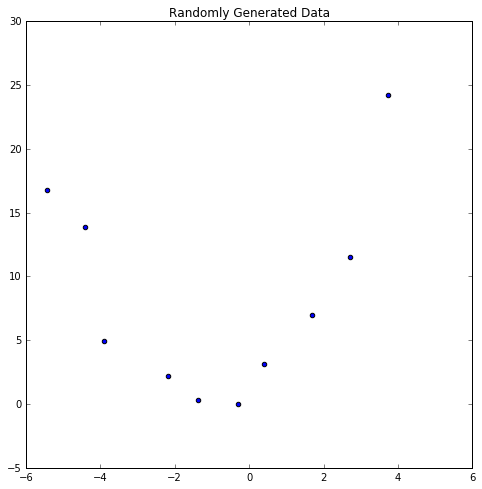

In [2]:
def generate_data():
    xs = np.arange(-5, 5, 1)
    
    data = [(x - random.random(), (x + random.random())**2) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.show()

In [4]:
xs, ys = generate_data()


In [7]:
lm = linear_model.LinearRegression()  ## creates an object to put a model in

In [9]:
# This function from numpy builds a matrix of powers for us
X = np.vander(xs, 4)
y = ys

print X,y

[[ -1.89131831e+02   3.29490642e+01  -5.74012755e+00   1.00000000e+00]
 [ -1.13533570e+02   2.34467613e+01  -4.84218559e+00   1.00000000e+00]
 [ -5.53654118e+01   1.45264343e+01  -3.81135596e+00   1.00000000e+00]
 [ -2.62937775e+01   8.84236942e+00  -2.97361218e+00   1.00000000e+00]
 [ -3.71065678e+00   2.39681137e+00  -1.54816387e+00   1.00000000e+00]
 [ -1.19005781e-01   2.41942431e-01  -4.91876439e-01   1.00000000e+00]
 [  7.57714747e-02   1.79062163e-01   4.23157374e-01   1.00000000e+00]
 [  6.49441463e+00   3.48091439e+00   1.86572088e+00   1.00000000e+00]
 [  1.12196540e+01   5.01171434e+00   2.23868585e+00   1.00000000e+00]
 [  3.77920834e+01   1.12616119e+01   3.35583252e+00   1.00000000e+00]] [17.11949980974223, 14.447893586789359, 7.6280132047828637, 1.1924676670799965, 0.15607485294224607, 0.24613032662837236, 1.4642611697653125, 6.1874239158782114, 13.511943534577659, 20.938402089954224]


In [11]:
model = lm.fit(X, y)
predictions = lm.predict(X)

print predictions
for item in zip(model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

[ 18.22263442  12.4935326    6.9340986    3.40437475  -0.10520189
  -0.30114805   1.44873945   8.32878974  11.00806966  21.45822087]
(0.043236715723012631, 'constant')
(1.1341082951844643, 'x')
(1.9811060238557037, 'x^2')
(0.0, 'x^3')


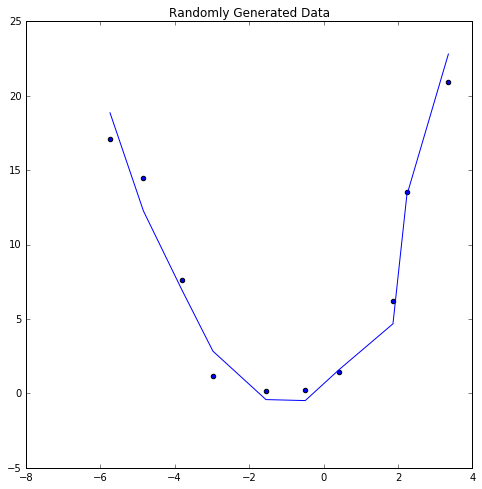

r^2: 0.967103181833


In [20]:
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", model.score(X, y) ## model may be over fit. Do we really need a cubic function?

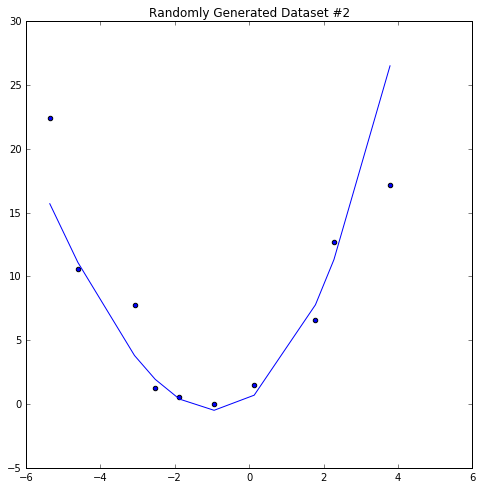

r^2: 0.713334301776


In [24]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", model.score(X, ys2)  ## new data with old model doesn't always work as well, because of over-fitting

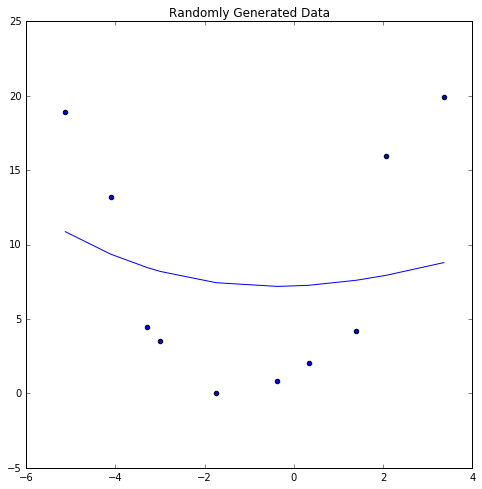

r^2: 0.197940115504


In [64]:
# Note: alpha plays the role of lambda in sklearn (lambda is the notation on e.g. Wikipedia)
rlm = linear_model.Ridge(alpha=4, normalize=True)   ## normalize=True makes things easier to compare. 
                        ## alpha limits the size of the coefficients. higher is more restrictive
# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)

In [27]:
for item in zip(ridge_model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

(-0.0054541543096725117, 'constant')
(0.092860528460678812, 'x')
(0.081427736735462455, 'x^2')
(0.0, 'x^3')


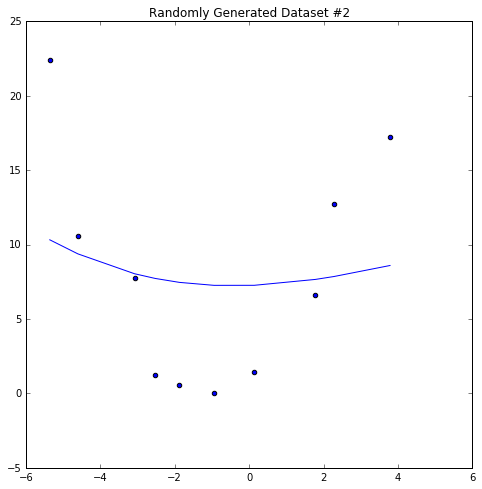

r^2: 0.204418619245


In [36]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)   ## still a bad model, but the variance is low

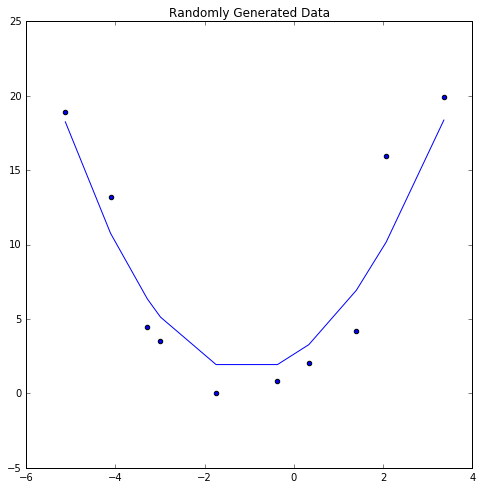

r^2: 0.886512198389
alpha: 0.1


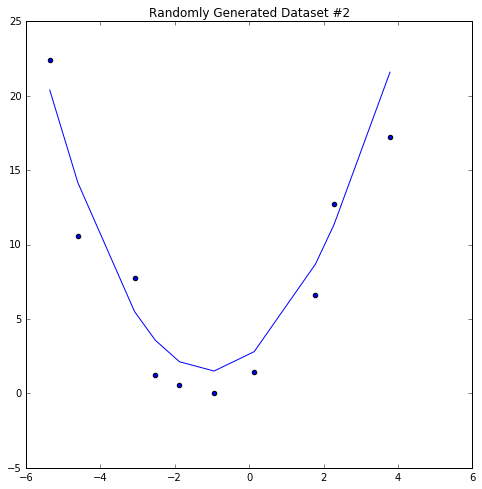

r^2: 0.888464761817


In [50]:
rlmcv = linear_model.RidgeCV(normalize=True)  ## uses cross-validation to pick the best alpha for the model
xs, ys = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)   ## the 4 is the number that the polynomial goes up to. 
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)
print "alpha:", rlmcv.alpha_

X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

In [51]:
import pandas as pd


In [52]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
## x = your choice of variables

In [53]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [93]:
bostonmodel = linear_model.RidgeCV(normalize=True)  ## uses cross-validation to pick the best alpha for the model

# Fit the polynomial again with ridge regularization
y = boston.target
x = df#[['NOX', 'RM', 'TAX', 'LSTAT', 'INDUS', 'B', 'AGE']]
bostonRidge = bostonmodel.fit(x, y)
# bostonPredict = bostonRidge.predict(x)

# plt.scatter(x, y)
# plt.title("Boston Predictions")
# plt.plot(x, bosPred)
# plt.show()
print "r^2:", bostonRidge.score(x, y)
print "alpha:", bostonmodel.alpha_


r^2: 0.731538965149
alpha: 0.1
